In [3]:
import pso
import particle
import os
from utils import load_cloud_dataset, load_breast_cancer, load_seg_data, load_digits_dataset, load_satelite_dataset, load_synthetic_dataset
import importlib
import numpy as np
import utils


In [60]:
importlib.reload(particle)
importlib.reload(pso)
importlib.reload(utils)

<module 'utils' from '/home/skholkin/projects/PSO_GMM/utils.py'>

In [65]:
config = pso.PSOConfig.from_json(os.path.join('configs', 'default_params.json'))

data = load_seg_data()
synth_dataset_name = 'Synthetic_dim_70_n_samples_1000_n_comp_15_c_separation_2.0.data.npy'
data = load_synthetic_dataset(synth_dataset_name)
n_runs = 5
eig_coef_list = [0.03, 0.1, 0.3, 1, 3]
eig_coef_list = [0.03]

for coef in eig_coef_list:
    config.eigvals_coef = coef

    res = []
    for i in range(n_runs):

        pso_algo = pso.PSOEigen(data, config)
        res.append(pso_algo.run())
        print(res[-1])

    for key in res[0].keys():
        value = np.mean([item[key] for item in res])

        std = np.std([item[key] for item in res])
        print('Eig Coef', coef)
        print(key, ': ', value, ' +- ', std)

Time for GMM init:  9.568243026733398  sec
Time for GMM reinit:  27.86493992805481  sec
Time for GMM reinit:  30.005738735198975  sec
Time for GMM reinit:  30.09090566635132  sec
{'em': 95.23865893305768, 'pso': 100.89518260508814, 'transformed': -inf, 'ref_em': 93.00234809669057}
Time for GMM init:  9.278109312057495  sec
Time for GMM reinit:  28.766791343688965  sec
Time for GMM reinit:  29.647016048431396  sec
Time for GMM reinit:  30.395034074783325  sec
{'em': 93.3422619158552, 'pso': 97.42906612357137, 'transformed': -inf, 'ref_em': 95.08260707918774}
Time for GMM init:  11.760849952697754  sec
Time for GMM reinit:  31.38305115699768  sec
Time for GMM reinit:  32.39162635803223  sec
Time for GMM reinit:  30.369343996047974  sec
{'em': 94.26111198288726, 'pso': 98.34193101712603, 'transformed': -inf, 'ref_em': 94.30227067505649}
Time for GMM init:  10.757892847061157  sec
Time for GMM reinit:  28.10406994819641  sec
Time for GMM reinit:  30.008288860321045  sec
Time for GMM reinit

/home/skholkin/projects/python_venv/lib/python3.10/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [60]:
res_dict

{'em': 74.24607799008619,
 'pso': 74.48534941906306,
 'ref_em_score': 74.16039295495584}

[]

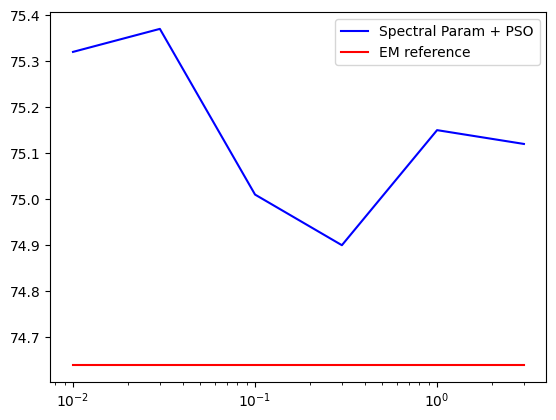

In [1]:
import matplotlib.pyplot as plt

res = [75.32, 75.37, 75.01, 74.9, 75.15, 75.12]
sigmas = [1e-02, 3e-02, 1e-1, 3e-1, 1, 3]

plt.plot(sigmas, res, c='blue', label='Spectral Param + PSO')
plt.plot(sigmas, [74.64 for i in range(len(res))], c='red', label='EM reference')
plt.legend()
plt.xscale('log')
plt.plot()
